<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [3]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [4]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [5]:
#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
df.dropna(subset = ["Year"], inplace=True)
df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

df = df.reset_index(drop=True)

#drop non-relevant columns
df.drop(['Data As Of', 'Start Date', 'End Date', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
df['Year'] = df['Year'].astype(int, errors = 'raise')
df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('0-24','12.0')
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?
df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
df['Condition']=df['Condition'].str.replace('Alzheimer disease','2.0')
df['Condition']=df['Condition'].str.replace('COVID-19','3.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrest','4.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrhythmia','5.0')
df['Condition']=df['Condition'].str.replace('Cerebrovascular diseases','6.0')
df['Condition']=df['Condition'].str.replace('Chronic lower respiratory diseases','7.0')
df['Condition']=df['Condition'].str.replace('Diabetes','8.0')
df['Condition']=df['Condition'].str.replace('Heart failure','9.0')
df['Condition']=df['Condition'].str.replace('Hypertensive diseases','10.0')
df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','11.0')
df['Condition']=df['Condition'].str.replace('Intentional and unintentional injury, poisoning, and other adverse events','12.0')
df['Condition']=df['Condition'].str.replace('Ischemic heart disease','13.0')
df['Condition']=df['Condition'].str.replace('Malignant neoplasms','14.0')
df['Condition']=df['Condition'].str.replace('Obesity','15.0')
df['Condition']=df['Condition'].str.replace('Other diseases of the circulatory system','16.0')
df['Condition']=df['Condition'].str.replace('Other diseases of the respiratory system','17.0')
df['Condition']=df['Condition'].str.replace('Renal failure','18.0')
df['Condition']=df['Condition'].str.replace('Respiratory arrest','19.0')
df['Condition']=df['Condition'].str.replace('Respiratory failure','20.0')
df['Condition']=df['Condition'].str.replace('Sepsis','21.0')
df['Condition']=df['Condition'].str.replace('Vascular and unspecified dementia','22.0')
df['Condition'] = df['Condition'].astype(float, errors = 'raise')

df = df.reset_index(drop=True)
display(df)

,Group,Year,Month,State,Condition,AgeGroup,CV19_Deaths,Date
0,By Month,2021,1,Alabama,11.0,39.5,18.0,2021-01-01
1,By Month,2020,6,Alabama,11.0,49.5,11.0,2020-06-01
2,By Month,2020,7,Alabama,11.0,49.5,10.0,2020-07-01
3,By Month,2020,8,Alabama,11.0,49.5,17.0,2020-08-01
4,By Month,2020,11,Alabama,11.0,49.5,14.0,2020-11-01
...,...,...,...,...,...,...,...,...
27785,By Month,2020,10,Wyoming,3.0,85.0,30.0,2020-10-01
27786,By Month,2020,11,Wyoming,3.0,85.0,56.0,2020-11-01
27787,By Month,2020,12,Wyoming,3.0,85.0,55.0,2020-12-01
27788,By Month,2021,1,Wyoming,3.0,85.0,33.0,2021-01-01


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult respiratory distress syndrome,390,0,2390,616,5956,1211,280,10,2980,1292,0,95,612,842,280,183,477,1974,0,716,970,994,734,833,677,0,88,2388,0,3402,173,3504,828,42,2009,259,105,1967,230,809,86,837,4862,299,0,690,626,181,201,0
Alzheimer disease,168,0,372,215,2696,366,174,45,792,472,0,46,587,621,331,103,207,168,11,131,314,507,631,147,458,12,58,23,11,403,60,463,443,92,968,341,135,957,72,158,136,320,1711,78,0,192,328,50,428,0
COVID-19,10825,178,15946,6043,65426,6961,8161,1546,35494,17929,292,2034,22450,13583,6014,4878,7537,9625,833,10283,13499,18477,7617,7580,11279,1504,2783,5715,1216,24529,4041,25296,13970,1508,22986,8500,2596,28441,2565,9142,1837,13219,55829,2360,116,11090,5598,2802,8180,519
Cardiac arrest,1422,0,1666,498,18613,163,902,0,2732,2403,0,0,533,658,225,296,329,389,0,207,1610,903,76,685,371,0,98,1161,12,5090,136,5983,1113,21,1896,354,0,1880,108,584,18,779,3622,14,0,189,221,54,45,0
Cardiac arrhythmia,507,0,816,283,4625,492,387,27,2493,740,0,71,1679,1211,412,223,698,397,10,901,744,938,821,345,631,69,247,146,53,1552,34,1377,807,69,1426,651,145,2437,94,839,105,863,4403,65,0,584,355,107,786,24
Cerebrovascular diseases,265,0,384,123,3164,305,204,22,1716,633,0,51,787,638,201,126,265,335,0,608,384,728,466,247,437,10,89,61,18,900,22,769,540,34,1122,397,67,1398,34,384,58,567,2490,15,0,327,139,13,416,0
Chronic lower respiratory diseases,632,0,985,397,4170,669,650,0,4381,974,0,122,2753,1580,510,325,798,561,0,899,912,1402,918,592,741,176,238,228,72,1233,184,1630,998,123,1898,1054,148,2355,167,756,172,1048,3946,80,0,627,399,204,1124,41
Diabetes,960,0,2196,659,14561,901,706,93,6882,1990,0,162,5517,1935,744,425,1266,1344,0,1809,994,1894,1351,1233,921,202,331,576,58,2467,506,2271,1501,122,2467,2014,252,3225,170,1038,264,1614,11045,185,0,968,796,207,1565,10
Heart failure,522,0,682,327,4298,500,614,24,1812,1031,0,114,2110,1177,483,263,702,543,11,669,1067,1213,919,645,685,50,203,142,40,1277,52,1413,937,128,1738,687,183,2373,189,725,164,778,3955,125,0,672,443,149,953,0


In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt

#from scipy import stats
#from scipy.stats import norm, skew

#import seaborn as sns
#color = sns.color_palette()
#sns.set_style('darkgrid')

#import warnings
#def ignore_warn(*args, **kwargs):
#  pass
#warnings.warn = ignore_warn

#corrmat = table2.corr(method="kendall")
#f, ax = plt.subplots(figsize=(5,4))
#sns.heatmap(corrmat, square=True)

#print(table2)
#print(table2.corr(method='kendall'))


KeyError: ignored

In [ ]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

KeyError: ignored

In [ ]:
#searches for correlation in AgeGroup columns of dataframe
import numpy as np

agegrp = pd.get_dummies(df, columns=['AgeGroup'])
#display(agegrp)
print(agegrp.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(agegrp.corr().abs().nlargest(3, 'CV19_Deaths').values[:4])

Index(['CV19_Deaths', 'AgeGroup_49.5', 'AgeGroup_85.0'], dtype='object')
[[0.00230832 0.01068332 1.         0.00942955 0.02408035 0.03841136
  0.04743911 0.03633644 0.0045324  0.02896387 0.04440575]
 [0.02362052 0.01556111 0.04743911 0.00830434 0.02437953 0.04471419
  1.         0.11905771 0.15122641 0.16340691 0.15986471]
 [0.04850735 0.02738155 0.04440575 0.01733364 0.05088734 0.09333184
  0.15986471 0.24850891 0.31565456 0.34107888 1.        ]]


Text(0, 0.5, 'CV19_Deaths')

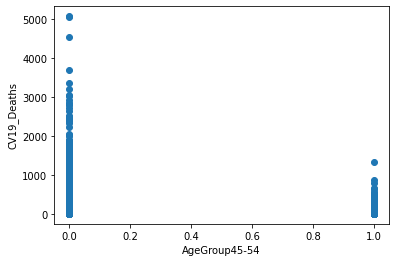

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(agegrp['AgeGroup_45-54'], agegrp['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup45-54')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

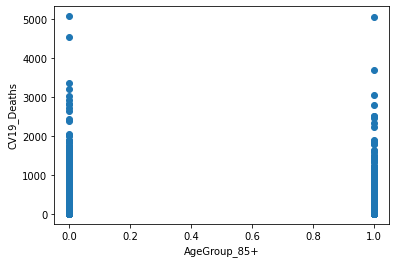

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(agegrp['AgeGroup_85+'], agegrp['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup_85+')
plt.ylabel('CV19_Deaths')

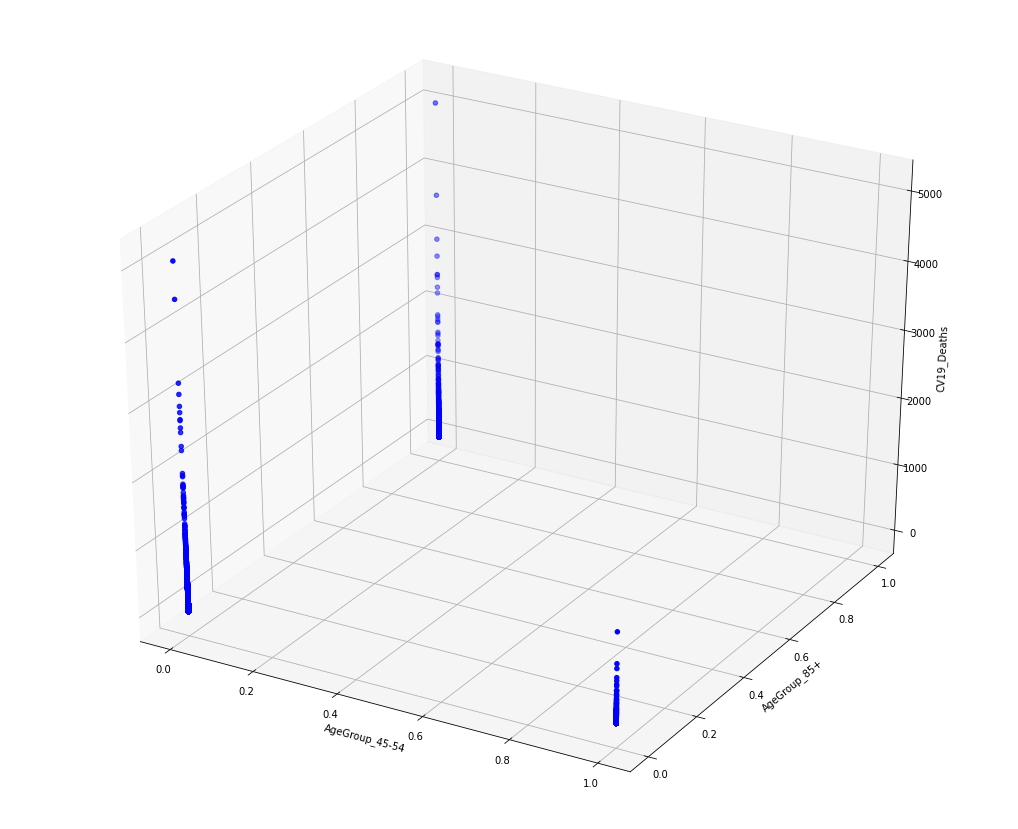

In [ ]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(agegrp['AgeGroup_45-54'],
          agegrp['AgeGroup_85+'],
          agegrp['CV19_Deaths'],
          c='b')

ax.set_xlabel("AgeGroup_45-54")
ax.set_ylabel("AgeGroup_85+")
ax.set_zlabel("CV19_Deaths")
plt.show()

In [ ]:
#Train the AgeGroup Model
#Create DataFrames to train model
x = pd.DataFrame(np.c_[agegrp['AgeGroup_45-54'], agegrp['AgeGroup_85+']], columns = ['AgeGroup_45-54','AgeGroup_85+'])
Y = agegrp['CV19_Deaths']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

#print train set
print(x_train.shape)
print(Y_train.shape)

(19453, 2)
(19453,)


In [ ]:
#print test shape
print(x_test.shape)
print(Y_test.shape)

(8337, 2)
(8337,)


In [ ]:
#train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make age prediction
age_pred = model.predict(x_test)

print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.0047


In [ ]:
#show actual age vs predicted age
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, age_pred)
print(mse)

17830.810334019046


Text(0.5, 1.0, 'Actual Age vs Predicted Age')

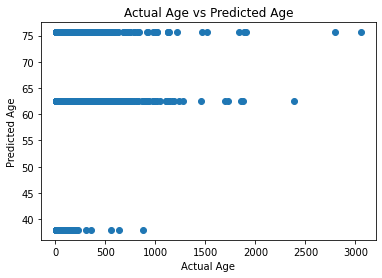

In [ ]:
plt.scatter(Y_test, age_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual Age vs Predicted Age")

In [9]:
#combined dataframe using float values for Age Group and maybe condition?
corr = df.corr()
print(corr)



                 Year     Month  Condition  AgeGroup  CV19_Deaths
Year         1.000000 -0.743046   0.000693 -0.056266     0.002308
Month       -0.743046  1.000000   0.003911  0.039703    -0.010683
Condition    0.000693  0.003911   1.000000  0.061037    -0.085684
AgeGroup    -0.056266  0.039703   0.061037  1.000000     0.084882
CV19_Deaths  0.002308 -0.010683  -0.085684  0.084882     1.000000


In [8]:
#combined data set
import numpy as np
print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])

Index(['CV19_Deaths', 'Condition', 'AgeGroup'], dtype='object')
[[2.30832173e-03 1.06833193e-02 8.56844418e-02 8.48819983e-02
  1.00000000e+00]
 [6.93075320e-04 3.91071133e-03 1.00000000e+00 6.10369378e-02
  8.56844418e-02]
 [5.62656138e-02 3.97033675e-02 6.10369378e-02 1.00000000e+00
  8.48819983e-02]]


Text(0, 0.5, 'CV19_Deaths')

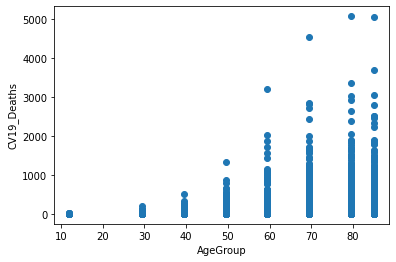

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['AgeGroup'], df['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

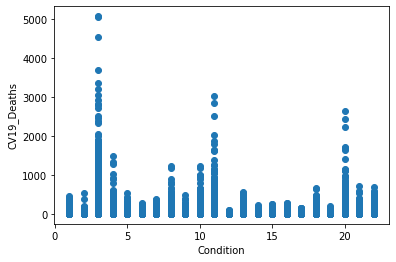

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Condition'], df['CV19_Deaths'], marker='o')
plt.xlabel('Condition')
plt.ylabel('CV19_Deaths')

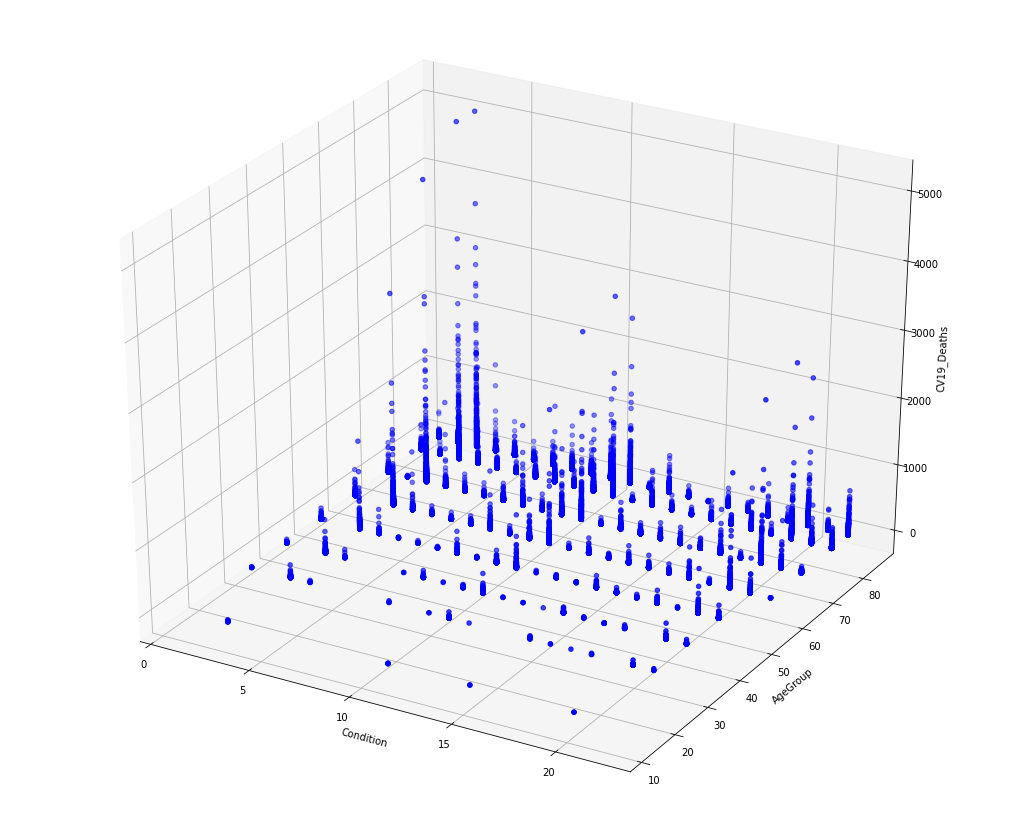

In [11]:
#full data frame with dummy colums
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Condition'],
          df['AgeGroup'],
          df['CV19_Deaths'],
          c='b')


ax.set_xlabel("Condition")
ax.set_ylabel("AgeGroup")
ax.set_zlabel("CV19_Deaths")
plt.show()


In [18]:
#Train the AgeGroup Model
#Create DataFrames to train model
x = pd.DataFrame(np.c_[df['AgeGroup'], df['Condition']], columns = ['AgeGroup','Condition'])
Y = df['CV19_Deaths']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

#print train set
print(x_train.shape)
print(Y_train.shape)

(19453, 2)
(19453,)


In [19]:
#print test shape
print(x_test.shape)
print(Y_test.shape)

(8337, 2)
(8337,)


In [20]:
#train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#make age prediction
age_pred = model.predict(x_test)

print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.0189


17577.711734332734


Text(0.5, 1.0, 'Actual Age vs Predicted Age')

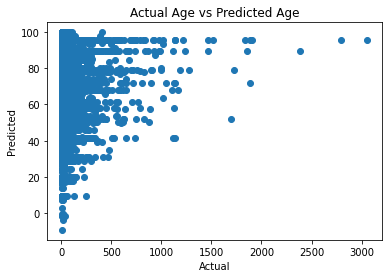

In [24]:
#show actual age vs predicted age
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, age_pred)
print(mse)

plt.scatter(Y_test, age_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Age vs Predicted Age")

In [25]:
print(model.intercept_)
print(model.coef_)

10.982712564711015
[ 1.06961637 -2.19194201]


In [27]:
print(model.predict([[85.0, 2.0]]))

[97.51621972]


In [ ]:
#Begin Logistic model - Can we predict death by using age and condition based on given CV-19 death data?

